# sklearn

https://scikit-learn.org/stable/tutorial/basic/tutorial.html

https://scikit-learn.org/stable/

https://scikit-learn.org/stable/user_guide.html

## Basic classification

https://scikit-learn.org/stable/modules/neighbors.html

- like gestalt

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://scikit-learn.org/stable/install.html



###Libraries

In [4]:
import sklearn.neighbors as nei
import pandas as pd

###Data

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/illinois-cse/data-fa14/gh-pages/data/iris.csv")

In [6]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


###Visualize

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


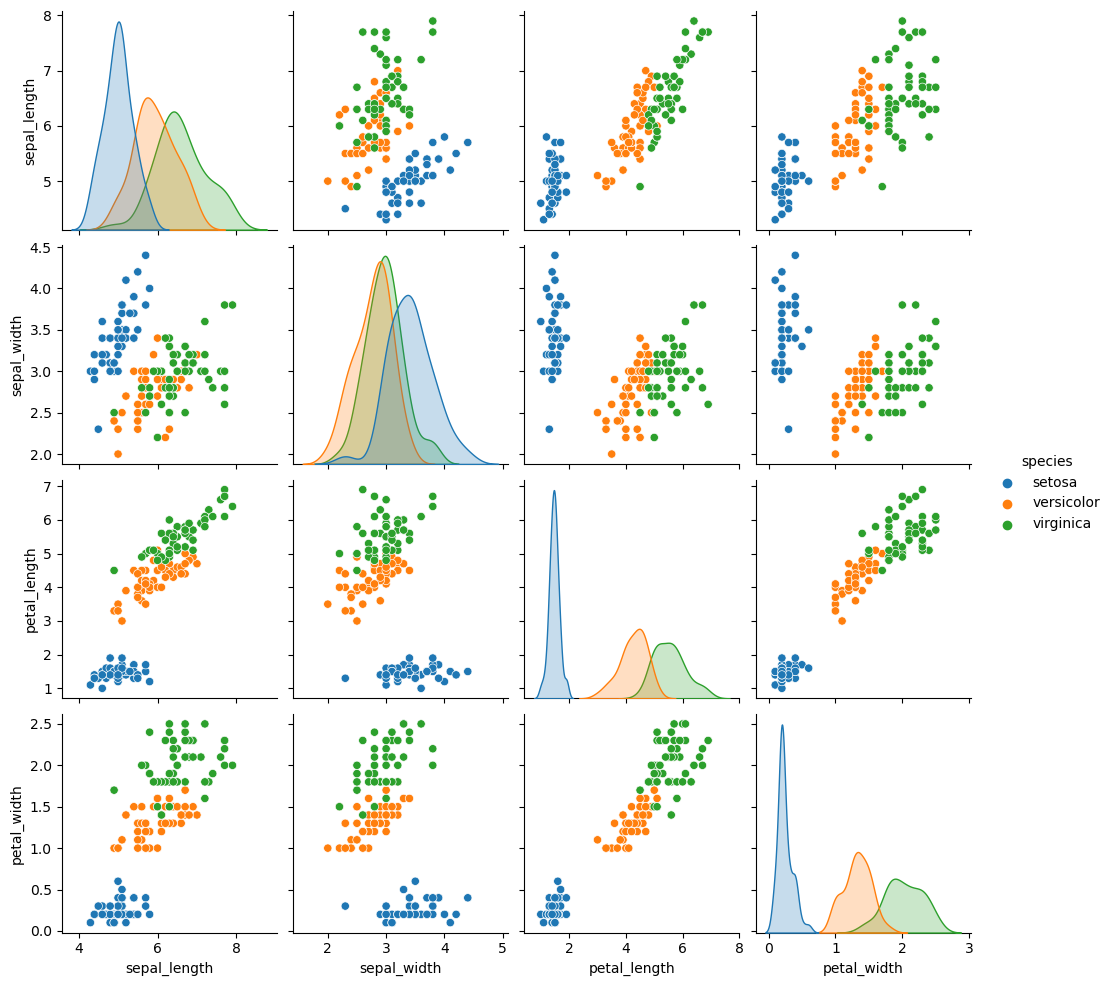

In [7]:
import seaborn as sns
sns.pairplot(df, hue = "species")

### Inputs and Outputs

In [8]:
inputs = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
outputs = df['species']

In [9]:
inputs

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
outputs

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

### Classifier

In [11]:
knn = nei.KNeighborsClassifier(n_neighbors=5) # instantiate the knn model, but actually 5 is default

### Fit

- training the classifier / fitting the data

- memorizing all the inputs

In [12]:
knn.fit(inputs, outputs)

KNeighborsClassifier()

### Predict 

In [13]:
df.loc[0] # row 0 is setosa

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

In [14]:
knn.predict([[5.1, 3.5, 1.4, 0.2]]) # list within a list, 2 [[]]

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [15]:
knn.predict([[5.3, 3.4, 1.3, 0.3]]) 
# sometimes when 2 species overlap, u can get the wrong output
# esp when there is one odd dot in another area

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [16]:
knn.predict([[5.1, 3.5, 1.4, 0.2], [5.1, 3.5, 1.4, 0.2], [5.1, 3.5, 1.4, 0.2]])

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa', 'setosa', 'setosa'], dtype=object)

### Evaluate

In [17]:
knn.predict(inputs) # notice in versicolor group, there is 1 virginicus

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
     

We can compare the predicted inputs with the actual outputs, using ==

In [18]:
knn.predict(inputs)==outputs

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Name: species, Length: 150, dtype: bool

In [19]:
(knn.predict(inputs)==outputs).sum() # how many trues,and subtract to get false
# 145 true, 5 false

145

- One error that can happen: Say we have 150 rows, and we split 100 train, 50 test. But what if the first 100 lines are all setosa?

- so we pick 100 randomly - train test split

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html




In [20]:
import sklearn.model_selection as mod

In [21]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
mod.train_test_split(inputs, outputs, test_size=0.33)

[     sepal_length  sepal_width  petal_length  petal_width
 131           7.9          3.8           6.4          2.0
 30            4.8          3.1           1.6          0.2
 79            5.7          2.6           3.5          1.0
 105           7.6          3.0           6.6          2.1
 125           7.2          3.2           6.0          1.8
 ..            ...          ...           ...          ...
 4             5.0          3.6           1.4          0.2
 50            7.0          3.2           4.7          1.4
 18            5.7          3.8           1.7          0.3
 31            5.4          3.4           1.5          0.4
 52            6.9          3.1           4.9          1.5
 
 [100 rows x 4 columns],
      sepal_length  sepal_width  petal_length  petal_width
 39            5.1          3.4           1.5          0.2
 123           6.3          2.7           4.9          1.8
 116           6.5          3.0           5.5          1.8
 86            6.7          3

In [22]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

In [23]:
inputs_train

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
43,5.0,3.5,1.6,0.6
49,5.0,3.3,1.4,0.2
12,4.8,3.0,1.4,0.1
71,6.1,2.8,4.0,1.3
...,...,...,...,...
34,4.9,3.1,1.5,0.1
109,7.2,3.6,6.1,2.5
36,5.5,3.5,1.3,0.2
95,5.7,3.0,4.2,1.2


In [24]:
outputs_train

96     versicolor
43         setosa
49         setosa
12         setosa
71     versicolor
          ...    
34         setosa
109     virginica
36         setosa
95     versicolor
112     virginica
Name: species, Length: 100, dtype: object

In [25]:
inputs_test

,sepal_length,sepal_width,petal_length,petal_width
28,5.2,3.4,1.4,0.2
142,5.8,2.7,5.1,1.9
63,6.1,2.9,4.7,1.4
127,6.1,3.0,4.9,1.8
82,5.8,2.7,3.9,1.2
83,6.0,2.7,5.1,1.6
73,6.1,2.8,4.7,1.2
67,5.8,2.7,4.1,1.0
79,5.7,2.6,3.5,1.0
125,7.2,3.2,6.0,1.8


In [26]:
outputs_test

28         setosa
142     virginica
63     versicolor
127     virginica
82     versicolor
83     versicolor
73     versicolor
67     versicolor
79     versicolor
125     virginica
68     versicolor
47         setosa
105     virginica
78     versicolor
0          setosa
24         setosa
19         setosa
70     versicolor
25         setosa
4          setosa
54     versicolor
13         setosa
64     versicolor
60     versicolor
41         setosa
56     versicolor
131     virginica
143     virginica
21         setosa
72     versicolor
106     virginica
137     virginica
35         setosa
85     versicolor
141     virginica
6          setosa
118     virginica
88     versicolor
76     versicolor
30         setosa
8          setosa
94     versicolor
113     virginica
66     versicolor
40         setosa
84     versicolor
102     virginica
114     virginica
100     virginica
44         setosa
Name: species, dtype: object

# So now we restart:

### Classifier

In [27]:
nn = nei.KNeighborsClassifier(n_neighbors=5)

### Fit

In [28]:
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier()

### Predict

In [29]:
knn.predict(inputs_test)==outputs_test

28      True
142     True
63      True
127     True
82      True
83     False
73      True
67      True
79      True
125     True
68     False
47      True
105     True
78      True
0       True
24      True
19      True
70     False
25      True
4       True
54      True
13      True
64      True
60      True
41      True
56      True
131     True
143     True
21      True
72     False
106    False
137     True
35      True
85      True
141     True
6       True
118     True
88      True
76      True
30      True
8       True
94      True
113     True
66      True
40      True
84      True
102     True
114     True
100     True
44      True
Name: species, dtype: bool

In [30]:
(knn.predict(inputs_test)==outputs_test).sum()
# we get 48/50, or 96/100 = 96% accurate
# could be different if u rerun the train test split bc it pics randomly eg 48, 49, 50
# so we use seed, eg : random_state=42

45

### Evaluate

In reality, when we are reporting the performance of this algo knn, we repeat a few times and get mean. 

- We use k-fold validation/ cross-fold validation - run many times and get mean and std. If tiny std, it's a consistent algo

# CORRELATION AND REGRESSION

## CORRELATION

https://realpython.com/numpy-scipy-pandas-correlation-python/

- 1 (=ve) or -1 (-ve) is good correlation

- under 3 is weak correlation



### Imports

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

### Data creation

- create random data for the x- and y-axes. Have the y data be a straight line function of the x data with some noise added

In [32]:
rng = np.random.default_rng()
x = rng.random(10) * 10

In [33]:
x

array([0.73961715, 3.24854386, 5.42944703, 1.56108181, 0.06502984,
       3.38084887, 4.75773241, 3.19307403, 1.62088906, 5.20132141])

In [34]:
# https://www.mathsisfun.com/equation_of_line.html

y = 3*x + 4 # + (rng.random(10)*2) 
# Equation of a line plus noise just so it's not perfect correlation (1)

In [35]:
y

array([ 6.21885146, 13.74563158, 20.2883411 ,  8.68324544,  4.19508953,
       14.14254662, 18.27319722, 13.57922208,  8.86266717, 19.60396423])

### Data visualization

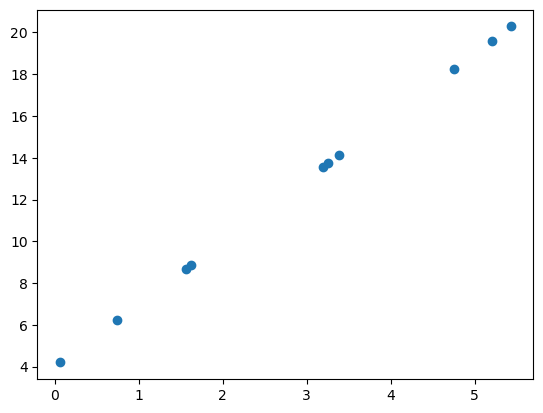

In [36]:
plt.scatter(x,y)
plt.show()

### Correlation (Pearson's)

In [37]:
r = np.corrcoef(x,y)
r
# will outout perfect correlation

array([[1., 1.],
       [1., 1.]])

In [38]:
# try something else

y = 3*x + 4 + (rng.random(10)*2)  
# Equation of a line plus noise just so it's not perfect correlation (1)

In [39]:
y

array([ 6.94193143, 14.83247052, 21.68766041,  8.95234538,  5.62602806,
       15.15958027, 19.31743522, 14.98829112, 10.05124349, 21.31908119])

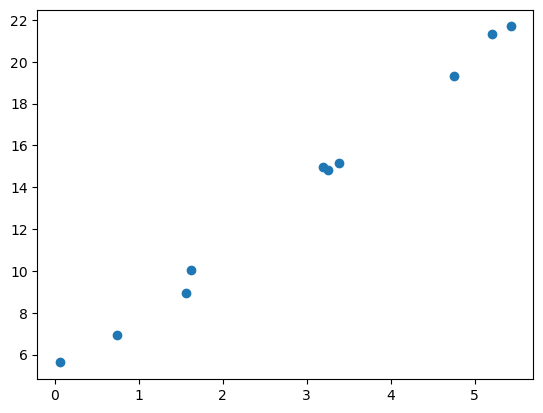

In [40]:
plt.scatter(x,y)
plt.show()

In [41]:
r = np.corrcoef(x,y)
r
# output: still very strong correlation

array([[1.        , 0.99797312],
       [0.99797312, 1.        ]])

In [42]:
# try something else

y = 3*x + 4 + (rng.random(10)*20)  # Equation of a line plus noise, * the bigger, the noisier

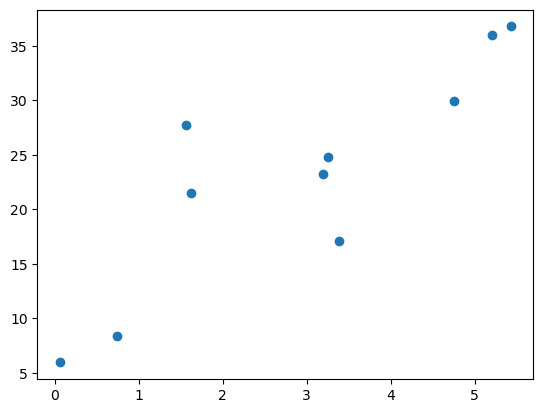

In [43]:
plt.scatter(x,y)
plt.show()

In [44]:
r = np.corrcoef(x,y)
r

array([[1.        , 0.85918341],
       [0.85918341, 1.        ]])

In [45]:
# try something else

y = 3*x + 4 + (rng.random(10)*20 - 10)  # Equation of a line plus noise, * bigger, the noisier

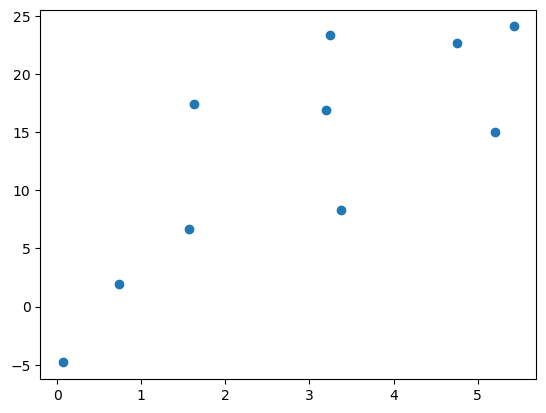

In [46]:
plt.scatter(x,y)
plt.show()

In [47]:
r = np.corrcoef(x,y)
r

array([[1.        , 0.78811567],
       [0.78811567, 1.        ]])

https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

- Return evenly spaced numbers over a specified interval.

- numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)


Note that the data does not have to be linear to observe a correlation.

Below is a simple example of a hypothetical relationship between energy and share prices.

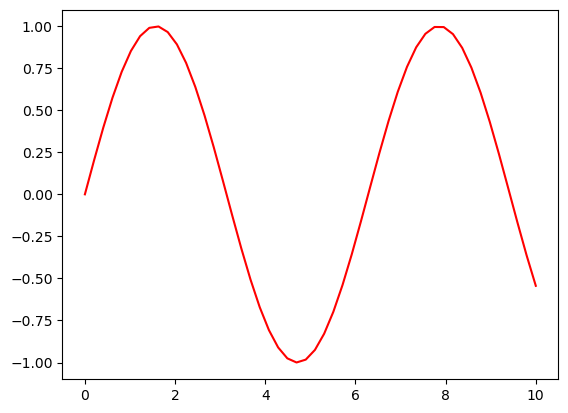

In [48]:
time = np.linspace(0,10) # nothing to do with correlation or regression. Just used for example
energy_price = np.sin(time)
#share_price = (np.sin(time))*3
plt.plot(time, energy_price, 'r')
#plt.plot(time, share_price, 'b')
plt.show()

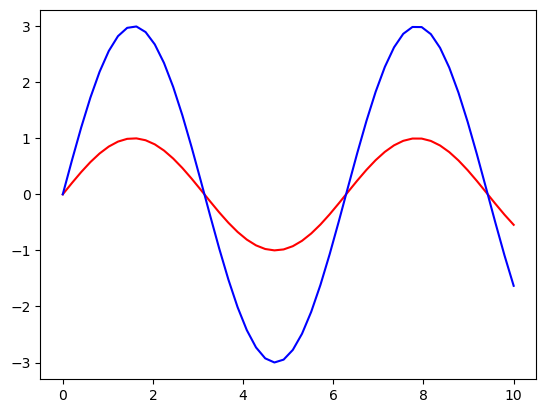

In [49]:
time = np.linspace(0,10)
energy_price = np.sin(time)
share_price = (np.sin(time))*3
plt.plot(time, energy_price, 'r')
plt.plot(time, share_price, 'b')
plt.show()

In [50]:
r = np.corrcoef(energy_price,share_price)
r

array([[1., 1.],
       [1., 1.]])

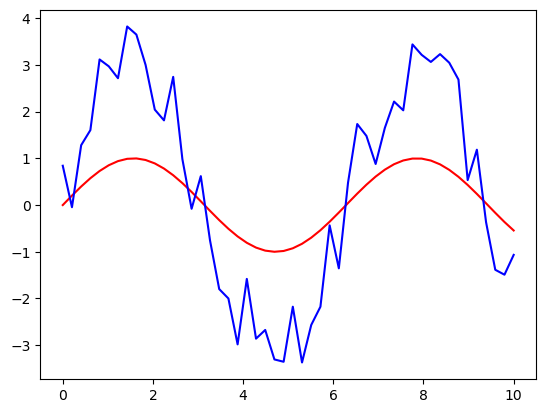

In [51]:
time = np.linspace(0,10)
energy_price = np.sin(time)
share_price = (np.sin(time))*3 + ((rng.random(50)*2) - 1)
plt.plot(time, energy_price, 'r')
plt.plot(time, share_price, 'b')
plt.show()

In [52]:
r = np.corrcoef(energy_price,share_price)
r

array([[1.        , 0.96069639],
       [0.96069639, 1.        ]])

### Correlation and Iris Dataset

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


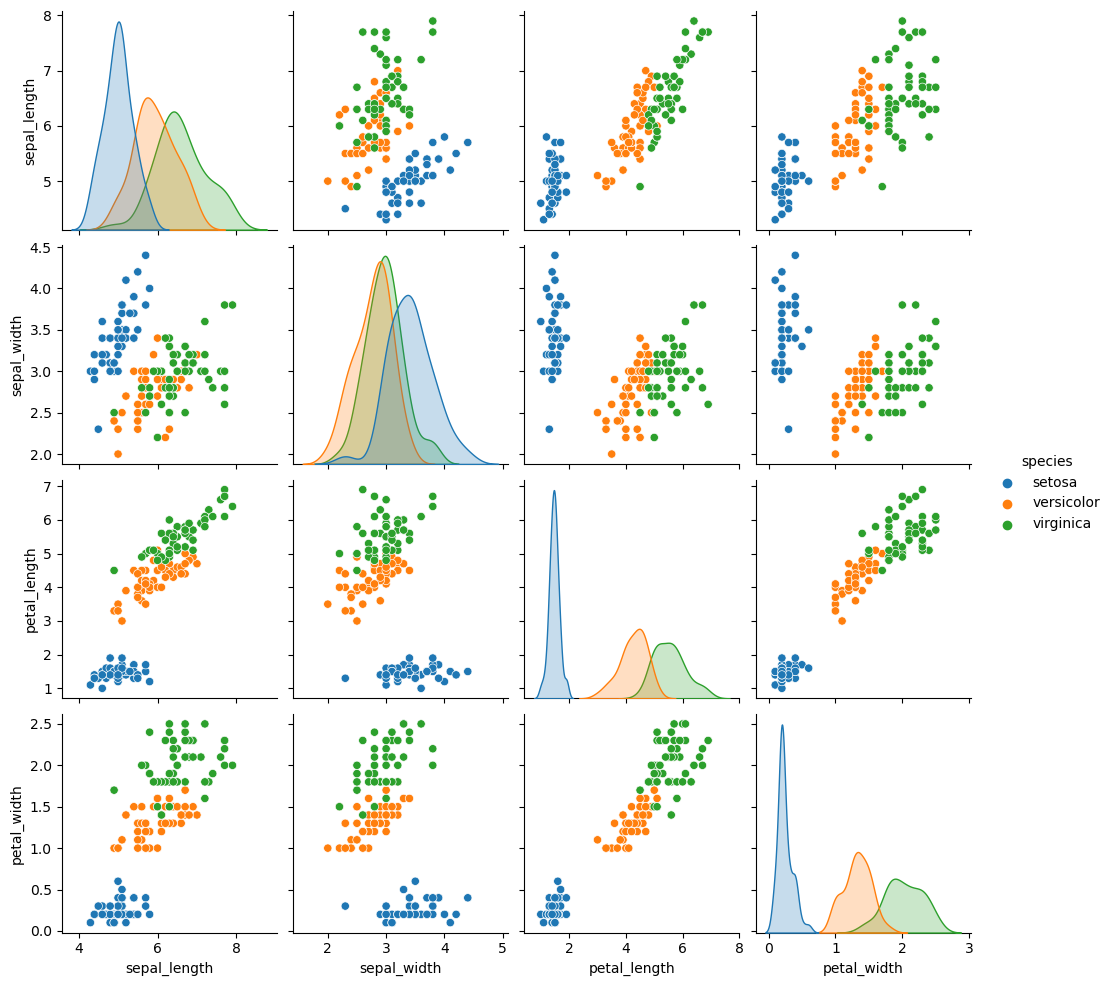

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/illinois-cse/data-fa14/gh-pages/data/iris.csv")
import seaborn as sns
sns.pairplot(df, hue = 'species');

In [54]:
r = np.corrcoef(df['sepal_width'],df['sepal_length'])
r

array([[ 1.        , -0.10936925],
       [-0.10936925,  1.        ]])

Separate the 3 species into 3 separate dataframes

In [55]:
setosadf = df.loc[df.loc[:, 'species']=='setosa']
versidf = df.loc[df.loc[:, 'species']=='versicolor']
virgidf = df.loc[df.loc[:, 'species']=='virginica']

Look at the correlations within the 3 dataframes separately

In [56]:
r = np.corrcoef(setosadf['sepal_width'], setosadf['sepal_length'])
r

array([[1.        , 0.74678037],
       [0.74678037, 1.        ]])

In [57]:
r = np.corrcoef(versidf['sepal_width'], versidf['sepal_length'])
r

array([[1.        , 0.52591072],
       [0.52591072, 1.        ]])

In [58]:
r = np.corrcoef(virgidf['sepal_width'], virgidf['sepal_length'])
r

array([[1.        , 0.45722782],
       [0.45722782, 1.        ]])

# REGRESSION

https://realpython.com/numpy-scipy-pandas-correlation-python/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



### Straight line data (noisy)

Lets look at our straight line data again:

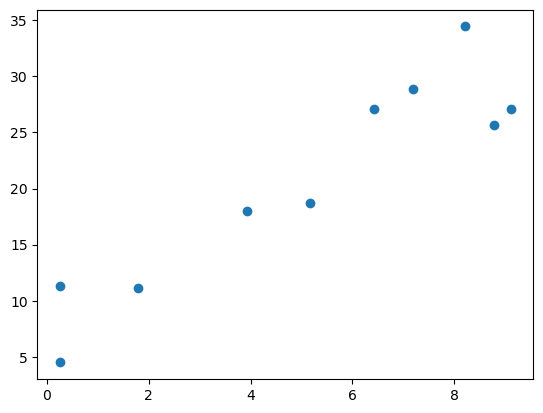

In [59]:
rng = np.random.default_rng()
x = rng.random(10) * 10
y = 3*x + 4 + ((rng.random(10)*20) - 10)  # Equation of a line plus noise
plt.scatter(x,y)
plt.show()

Reshape the data for passsing it to the LinearRegression object

In [60]:
x

# it doesnt like this, will return error: Expected 2D array, got 1D array instead.
# so it needs to be reshaped

array([8.21292317, 6.42244081, 8.78580201, 9.11369769, 5.16136432,
       0.25659061, 1.79561792, 7.18559103, 0.25894855, 3.93480511])

In [79]:
y

array([[34.43826351],
       [27.11149418],
       [25.66907602],
       [27.11677572],
       [18.67339245],
       [ 4.50007586],
       [11.17849839],
       [28.86991671],
       [11.31475633],
       [18.01701608]])

In [61]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

# becomes a list of lists

In [62]:
x

array([[8.21292317],
       [6.42244081],
       [8.78580201],
       [9.11369769],
       [5.16136432],
       [0.25659061],
       [1.79561792],
       [7.18559103],
       [0.25894855],
       [3.93480511]])

In [78]:
y

array([[34.43826351],
       [27.11149418],
       [25.66907602],
       [27.11677572],
       [18.67339245],
       [ 4.50007586],
       [11.17849839],
       [28.86991671],
       [11.31475633],
       [18.01701608]])

Create an empty LineRegression object and fit the model

In [63]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

Make a prediction

In [64]:
pred = lr.predict([[5]]) # predict the value of y for x=5
pred

array([[20.39720184]])

Draw a line to represent the model

In [65]:
x_test = np.linspace(0,20) # generate uniform values between 0 and 20
# remember we have to reshape it
x_testShaped = x_test.reshape(-1,1)

In [66]:
y_testPred = lr.predict(x_testShaped)

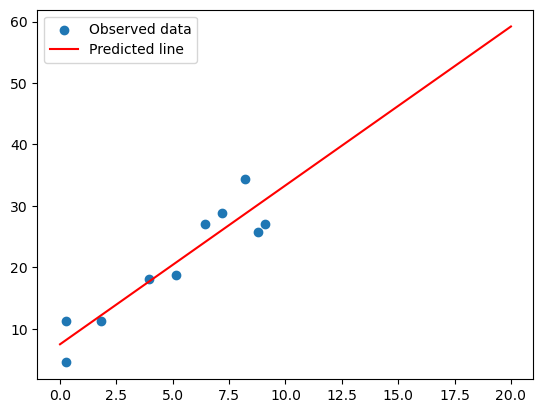

In [80]:
plt.scatter(x,y)
plt.plot(x_test, y_testPred, 'r')
plt.legend(["Observed data", "Predicted line"])
plt.show()

### Iris data Regression 

/home/rsalgo/anaconda3/envs/base_3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


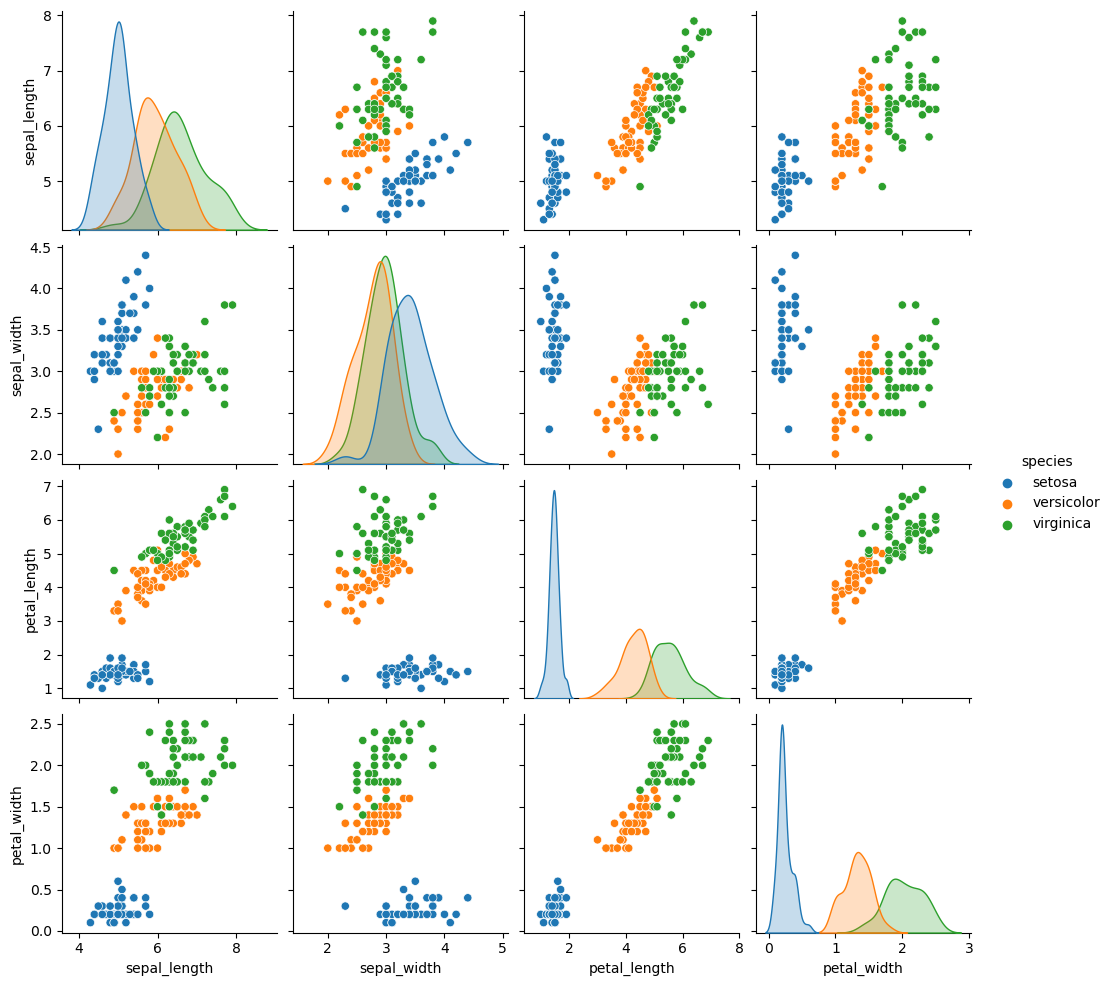

In [81]:
df = pd.read_csv("https://raw.githubusercontent.com/illinois-cse/data-fa14/gh-pages/data/iris.csv")
import seaborn as sns
sns.pairplot(df, hue = 'species')

In [69]:
sW = df['sepal_width'].to_numpy()
sW
#sL = df['sepal_length'].to_numpy()
#sL
#sW = sW.reshape(-1,1)
#sL = sL.reshape(-1,1)

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

In [82]:
# sW = df['sepal_width'].to_numpy()
# sW
sL = df['sepal_length'].to_numpy()
sL
#sW = sW.reshape(-1,1)
#sL = sL.reshape(-1,1)

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [70]:
#sW = df['sepal_width'].to_numpy()
#sL = df['sepal_length'].to_numpy()
sW = sW.reshape(-1,1)
sW
#sL = sL.reshape(-1,1)
#sL

array([[3.5],
       [3. ],
       [3.2],
       [3.1],
       [3.6],
       [3.9],
       [3.4],
       [3.4],
       [2.9],
       [3.1],
       [3.7],
       [3.4],
       [3. ],
       [3. ],
       [4. ],
       [4.4],
       [3.9],
       [3.5],
       [3.8],
       [3.8],
       [3.4],
       [3.7],
       [3.6],
       [3.3],
       [3.4],
       [3. ],
       [3.4],
       [3.5],
       [3.4],
       [3.2],
       [3.1],
       [3.4],
       [4.1],
       [4.2],
       [3.1],
       [3.2],
       [3.5],
       [3.1],
       [3. ],
       [3.4],
       [3.5],
       [2.3],
       [3.2],
       [3.5],
       [3.8],
       [3. ],
       [3.8],
       [3.2],
       [3.7],
       [3.3],
       [3.2],
       [3.2],
       [3.1],
       [2.3],
       [2.8],
       [2.8],
       [3.3],
       [2.4],
       [2.9],
       [2.7],
       [2. ],
       [3. ],
       [2.2],
       [2.9],
       [2.9],
       [3.1],
       [3. ],
       [2.7],
       [2.2],
       [2.5],
       [3.2],
      

In [83]:
#sW = df['sepal_width'].to_numpy()
#sL = df['sepal_length'].to_numpy()
# sW = sW.reshape(-1,1)
# sW
sL = sL.reshape(-1,1)
sL

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ],
       [7. ],
       [6.4],
       [6.9],
       [5.5],
       [6.5],
       [5.7],
       [6.3],
       [4.9],
       [6.6],
       [5.2],
       [5. ],
       [5.9],
       [6. ],
       [6.1],
       [5.6],
       [6.7],
       [5.6],
       [5.8],
       [6.2],
       [5.6],
       [5.9],
      

In [86]:
sW = df['sepal_width'].to_numpy()
sL = df['sepal_length'].to_numpy()
sW = sW.reshape(-1,1)
sL = sL.reshape(-1,1)

In [87]:
lr = LinearRegression()
lr.fit(sW,sL)

LinearRegression()

Draw a line to represent the model

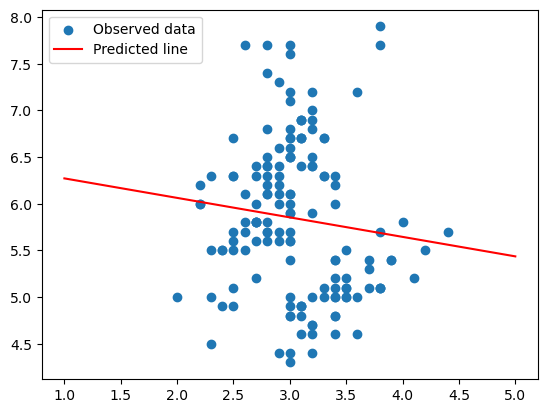

In [88]:
# remember to convert dataframe to numpy array

# https://stackoverflow.com/questions/13187778/convert-pandas-dataframe-to-numpy-array

sW_test = np.linspace(1,5)
sW_testShaped = sW_test.reshape(-1,1)
sL_testPred = lr.predict(sW_testShaped)
sW_testShaped = sW_test.reshape(-1,1)
plt.scatter(sW, sL)
plt.plot(sW_test, sL_testPred, 'r')
plt.legend(["Observed data", "Predicted line"])
plt.show()

# notice it's the same plot as line 1, column 2 in the pairplot, but with negative correlation

We dont see much when we do sepal width and length for all 3 species.

So, look into each species.
Break up the dataframes into 3 separate frames according to the species:

In [90]:
setosadf = df.loc[df.loc[:, 'species']=='setosa']
versidf = df.loc[df.loc[:, 'species']=='versicolor']
virgidf = df.loc[df.loc[:, 'species']=='virginica']

Rerun the LinearRegression on each separately and visualize

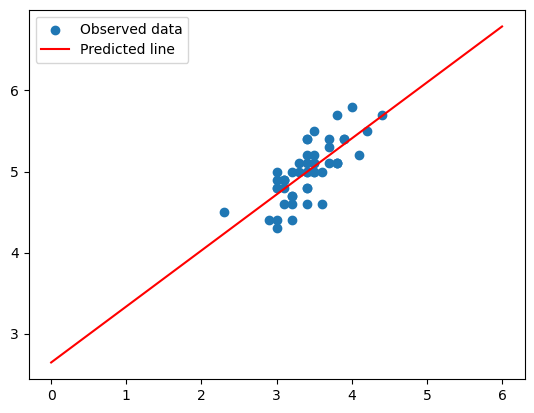

In [96]:
#setosa:
sW = setosadf['sepal_width'].to_numpy()
sL = setosadf['sepal_length'].to_numpy()
sW = sW.reshape(-1,1)
sL = sL.reshape(-1,1)
lr = LinearRegression()
lr.fit(sW,sL)
sW_test = np.linspace(0,6) # nothing to do with correlation or regression. Just used for example
sW_testShaped = sW_test.reshape(-1,1)
sL_testPred = lr.predict(sW_testShaped)
sW_testShaped = sW_test.reshape(-1,1)
plt.scatter(sW, sL)
plt.plot(sW_test, sL_testPred, 'r')
plt.legend(["Observed data", "Predicted line"])
plt.show()

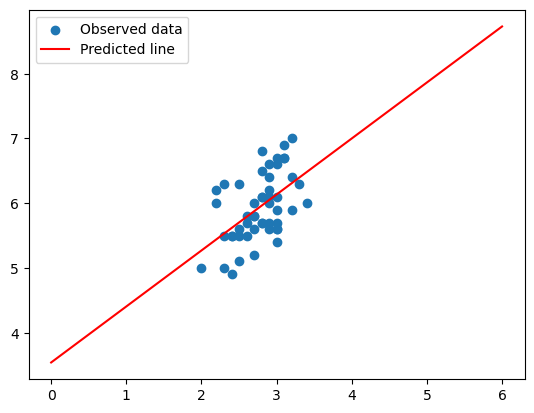

In [95]:
#versicolor:
sW = versidf['sepal_width'].to_numpy()
sL = versidf['sepal_length'].to_numpy()
sW = sW.reshape(-1,1)
sL = sL.reshape(-1,1)
lr = LinearRegression()
lr.fit(sW,sL)
sW_test = np.linspace(0,6)
sW_testShaped = sW_test.reshape(-1,1)
sL_testPred = lr.predict(sW_testShaped)
sW_testShaped = sW_test.reshape(-1,1)
plt.scatter(sW, sL)
plt.plot(sW_test, sL_testPred, 'r')
plt.legend(["Observed data", "Predicted line"])
plt.show()

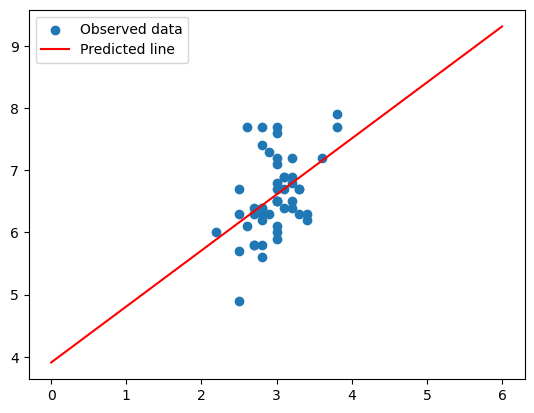

In [94]:
#virginica:
sW = virgidf['sepal_width'].to_numpy()
sL = virgidf['sepal_length'].to_numpy()
sW = sW.reshape(-1,1)
sL = sL.reshape(-1,1)
lr = LinearRegression()
lr.fit(sW,sL)
sW_test = np.linspace(0,6)
sW_testShaped = sW_test.reshape(-1,1)
sL_testPred = lr.predict(sW_testShaped)
sW_testShaped = sW_test.reshape(-1,1)
plt.scatter(sW, sL)
plt.plot(sW_test, sL_testPred, 'r')
plt.legend(["Observed data", "Predicted line"])
plt.show()